<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [20]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-03-09 12:43:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.2MB/s    in 2.8s    

2025-03-09 12:43:48 (55.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [12]:
# Mapping age ranges to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65,
    'Prefer not to say': None  # You can choose to set it to NaN or any other numeric value
}

# Apply the mapping to the 'Age' column
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Optionally handle 'Prefer not to say' or missing values by filling or dropping
df = df.dropna(subset=['AgeNumeric'])  # Drop rows where 'AgeNumeric' is NaN


In [13]:
# Mapping SOPartFreq categories to numeric values
sopartfreq_mapping = {
    'Less than once per month or monthly': 1,
    'I have never participated in Q&A on Stack Overflow': 0,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}

# Apply the mapping to the 'SOPartFreq' column
df['SOPartFreqNumeric'] = df['SOPartFreq'].map(sopartfreq_mapping)

# Optionally handle NaN values (drop or fill)
df = df.dropna(subset=['SOPartFreqNumeric'])  # Drop rows with NaN in SOPartFreq


/tmp/ipykernel_301/111081435.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


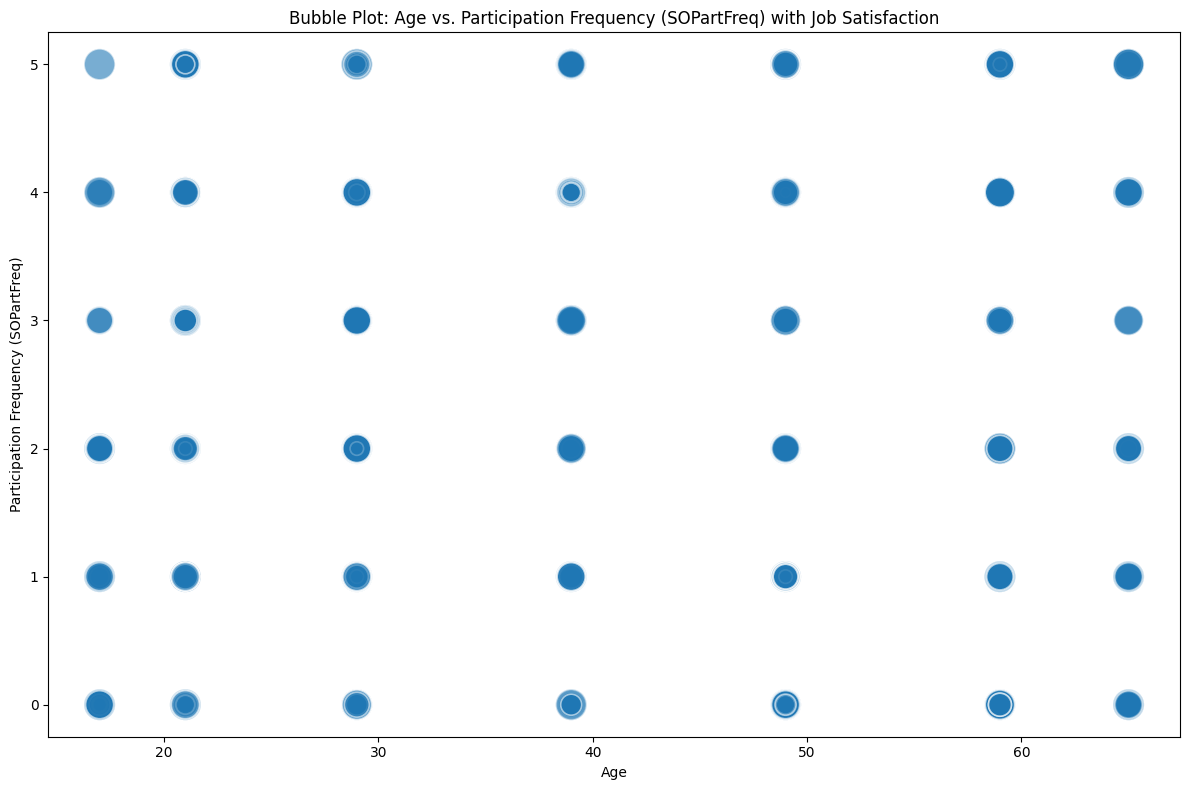

In [16]:
df = df.dropna(subset=['JobSat'])

# Bubble plot with 'AgeNumeric' on X, 'SOPartFreqNumeric' on Y, and bubble size representing 'JobSat'
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='AgeNumeric',  # Age (converted to numeric)
    y='SOPartFreqNumeric',  # Numeric Participation Frequency
    size='JobSat',  # Size of the bubbles represents Job Satisfaction
    data=df,  # Data frame containing the data
    #hue='Country',  # Optional: color the points based on 'Country' or any other categorical column
    palette='Set2',  # Color palette
    sizes=(50, 500),  # Range of bubble sizes
    alpha=0.6,  # Transparency of the bubbles
    legend=None  # Optional: Remove legend if it gets too cluttered
)

# Customize plot labels and title
plt.title('Bubble Plot: Age vs. Participation Frequency (SOPartFreq) with Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Participation Frequency (SOPartFreq)')

# Display the plot
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [17]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to check for outliers.
    >
    Returns:
    - df_cleaned (DataFrame): The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers: Keep rows where the column value is between the lower and upper bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

/tmp/ipykernel_301/3983395449.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


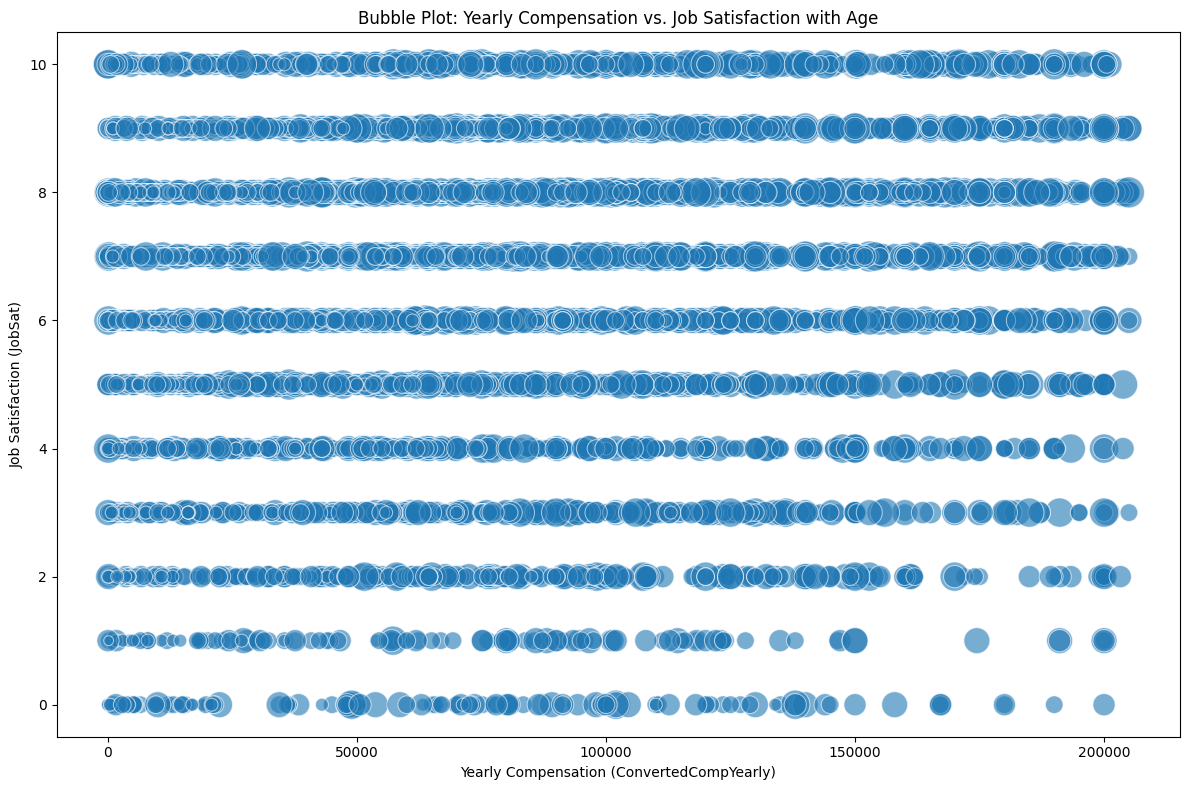

In [22]:


df = remove_outliers_iqr(df,"ConvertedCompYearly")
# Assuming 'AgeNumeric' has already been mapped to numeric values and other preprocessing steps are done
plt.figure(figsize=(12, 8))

# Bubble plot with 'ConvertedCompYearly' on X, 'JobSat' on Y, and bubble size representing 'AgeNumeric'
sns.scatterplot(
    x='ConvertedCompYearly',  # Yearly compensation
    y='JobSat',  # Job satisfaction
    size='AgeNumeric',  # Size of the bubbles represents age
    data=df,  # Data frame containing the data
    #hue='Country',  # Optional: color the points based on 'Country' or any other categorical column
    palette='Set2',  # Color palette
    sizes=(50, 500),  # Range of bubble sizes
    alpha=0.6,  # Transparency of the bubbles
    legend=None  # Optional: Remove legend if it gets too cluttered
)

# Customize plot labels and title
plt.title('Bubble Plot: Yearly Compensation vs. Job Satisfaction with Age')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')


# Display the plot
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



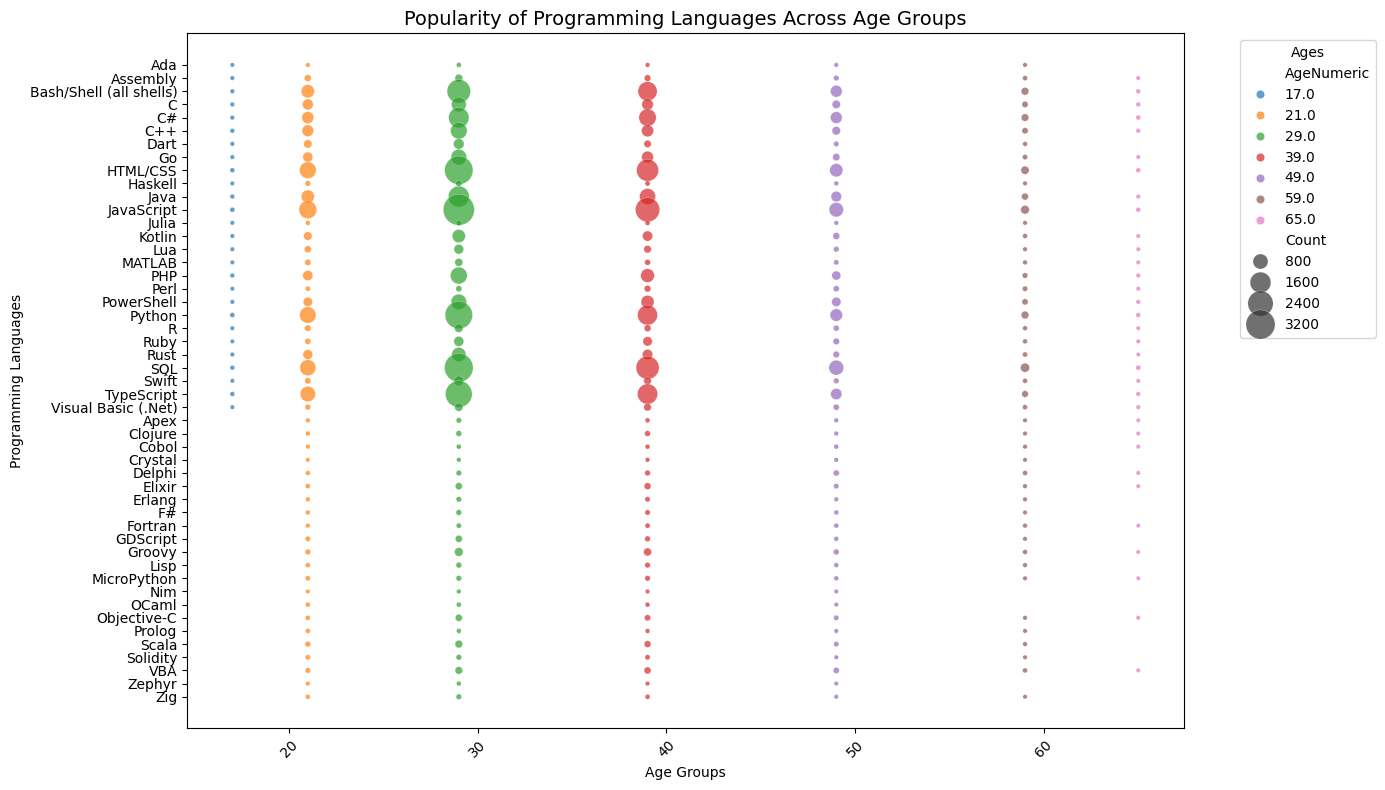

In [25]:
# Step 1: Explode the 'LanguageHaveWorkedWith' column
df_langs = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Mapping age ranges to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65,
    'Prefer not to say': None  # You can choose to set it to NaN or any other numeric value
}

# Apply the mapping to the 'Age' column
df_langs['AgeNumeric'] = df_langs['Age'].map(age_mapping)

# Optionally handle 'Prefer not to say' or missing values by filling or dropping
df_langs = df_langs.dropna(subset=['AgeNumeric'])  # Drop rows where 'AgeNumeric' is NaN

df_langs['LanguageHaveWorkedWith'] = df_langs['LanguageHaveWorkedWith'].str.split(';')
df_langs = df_langs.explode('LanguageHaveWorkedWith')

# Step 2: Aggregate counts per Age group and Language
lang_age_counts = df_langs.groupby(['AgeNumeric', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Step 3: Set up the bubble plot
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=lang_age_counts,
    x='AgeNumeric',  # Age groups on X-axis
    y='LanguageHaveWorkedWith',  # Programming languages on Y-axis
    size='Count',  # Bubble size represents the frequency
    hue='AgeNumeric',  # Different colors for each Age group
    palette='tab10',  # Color palette
    sizes=(10, 500),  # Adjust bubble sizes
    alpha=0.7  # Transparency
)

# Step 4: Customize plot
plt.title('Popularity of Programming Languages Across Age Groups', fontsize=14)
plt.xlabel('Age Groups')
plt.ylabel('Programming Languages')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Ages', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 5: Show the plot
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [26]:
# Step 1: Split multiple database responses into separate rows
df_databases = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()
df_databases = df_databases.assign(DatabaseWantToWorkWith=df_databases['DatabaseWantToWorkWith'].str.split(';'))
df_databases = df_databases.explode('DatabaseWantToWorkWith')

# Step 2: Group by database
database_grouped = df_databases.groupby('DatabaseWantToWorkWith').agg(
    num_respondents=('DatabaseWantToWorkWith', 'size'),
    avg_job_satisfaction=('JobSat', 'mean')
).reset_index()

# Step 3: Sort by popularity (optional)
database_grouped = database_grouped.sort_values(by='num_respondents', ascending=False)


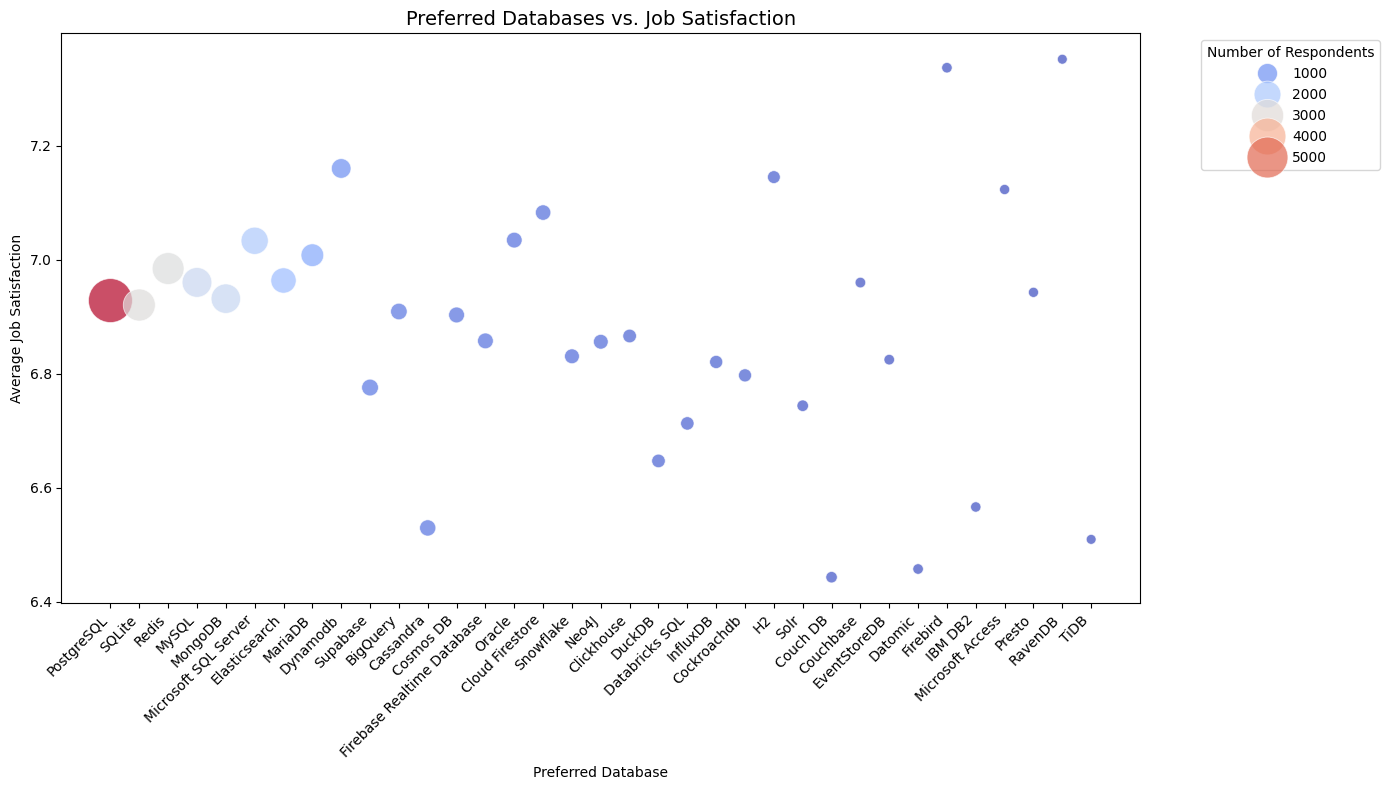

In [27]:


plt.figure(figsize=(14, 8))

bubble_plot = sns.scatterplot(
    data=database_grouped,
    x='DatabaseWantToWorkWith',
    y='avg_job_satisfaction',
    size='num_respondents',
    hue='num_respondents',
    palette='coolwarm',
    sizes=(50, 1000),
    alpha=0.7
)

plt.title('Preferred Databases vs. Job Satisfaction', fontsize=14)
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [29]:
df = remove_outliers_iqr(df,'ConvertedCompYearly')

# Step 1: Split multi-role responses into separate rows
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Step 2: Aggregate Data
role_grouped = df_roles.groupby('DevType').agg(
    avg_compensation=('ConvertedCompYearly', 'mean'),
    avg_job_satisfaction=('JobSat', 'mean'),
    num_respondents=('DevType', 'size')
).reset_index()

# Step 3: Sort by popularity (optional)
role_grouped = role_grouped.sort_values(by='num_respondents', ascending=False)


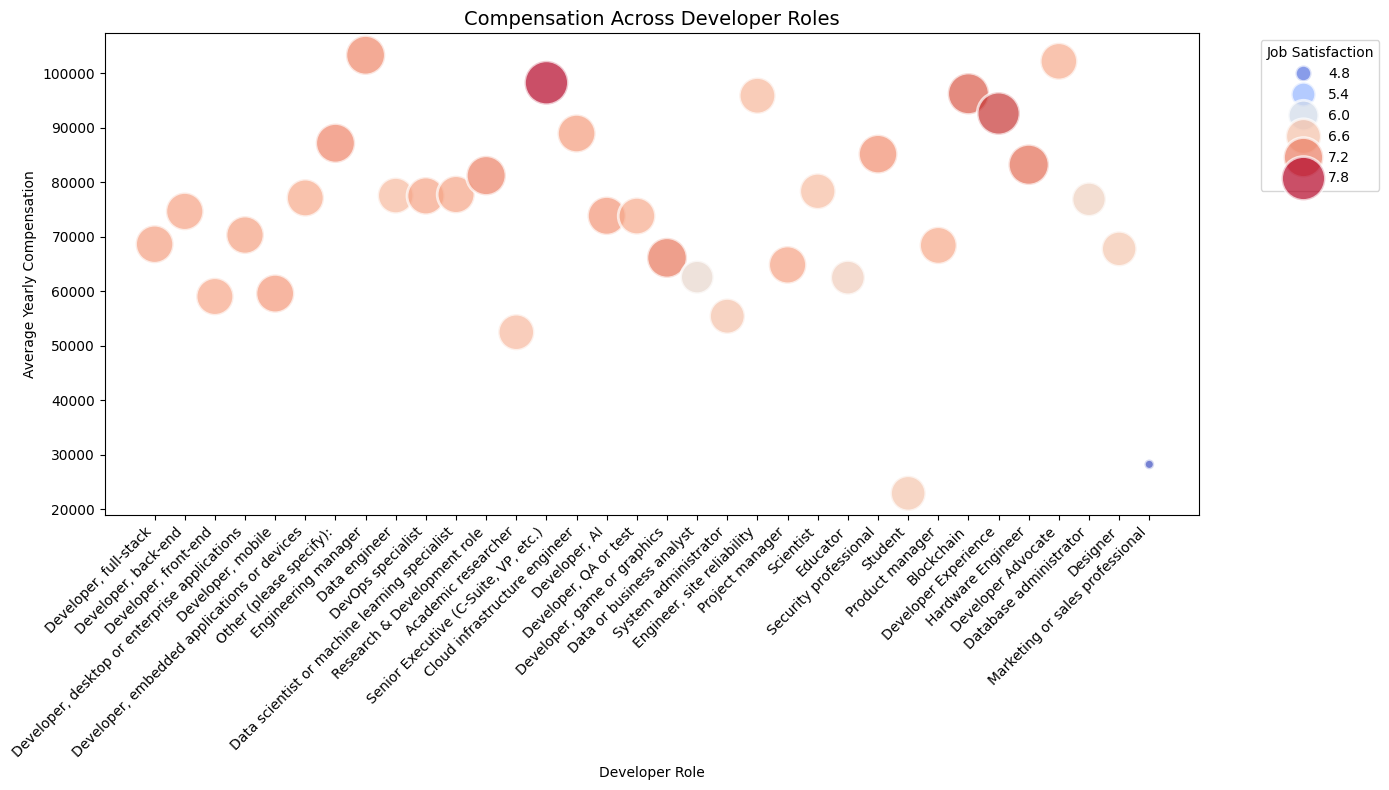

In [30]:

plt.figure(figsize=(14, 8))

bubble_chart = sns.scatterplot(
    data=role_grouped,
    x='DevType',
    y='avg_compensation',
    size='avg_job_satisfaction',
    hue='avg_job_satisfaction',
    palette='coolwarm',
    sizes=(50, 1000),
    alpha=0.7
)

plt.title('Compensation Across Developer Roles', fontsize=14)
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


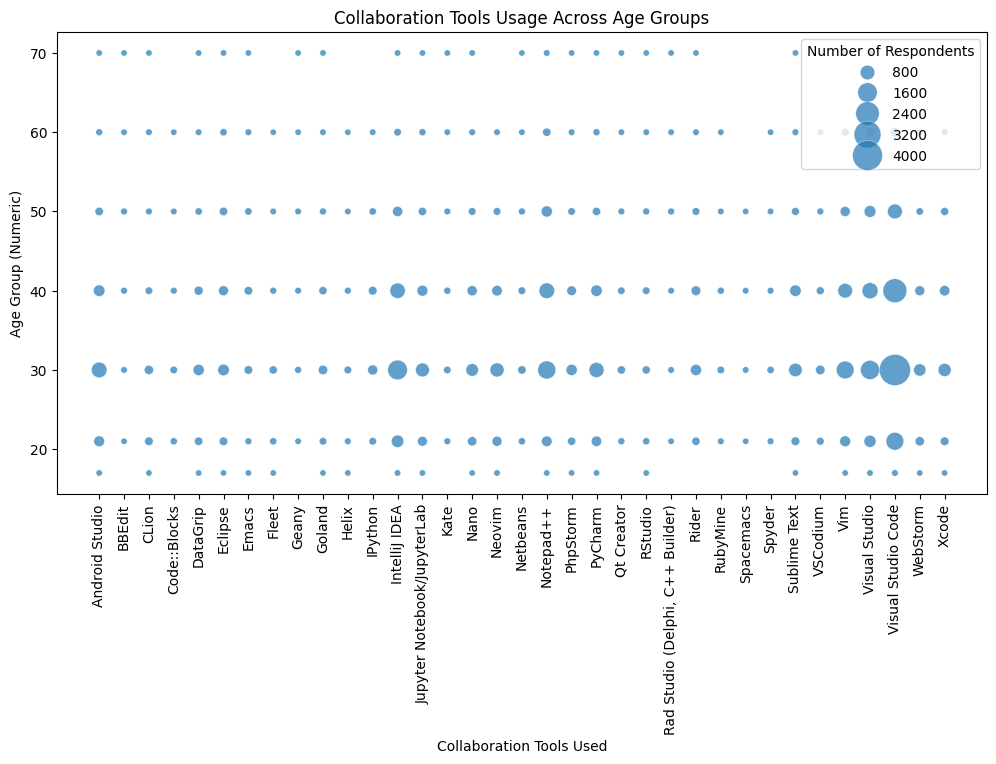

In [31]:

# Sample Age Mapping (Modify if needed)
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    'Prefer not to say': None  # You can choose to set it to NaN or any other numeric value
}

# Map Age Groups to Numeric Values
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Split Multi-Selected Collaboration Tools
df_collab = df[["AgeNumeric", "NEWCollabToolsHaveWorkedWith"]].dropna()
df_collab = df_collab.assign(NEWCollabToolsHaveWorkedWith=df_collab["NEWCollabToolsHaveWorkedWith"].str.split(";"))
df_collab = df_collab.explode("NEWCollabToolsHaveWorkedWith")

# Aggregate: Count the number of respondents per tool for each age group
collab_counts = df_collab.groupby(["NEWCollabToolsHaveWorkedWith", "AgeNumeric"]).size().reset_index(name="Count")

# Bubble Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=collab_counts,
    x="NEWCollabToolsHaveWorkedWith",
    y="AgeNumeric",
    size="Count",
    sizes=(20, 500),  # Adjust bubble sizes
    alpha=0.7
)

# Customization
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Collaboration Tools Used")
plt.ylabel("Age Group (Numeric)")
plt.title("Collaboration Tools Usage Across Age Groups")
plt.legend(title="Number of Respondents")
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



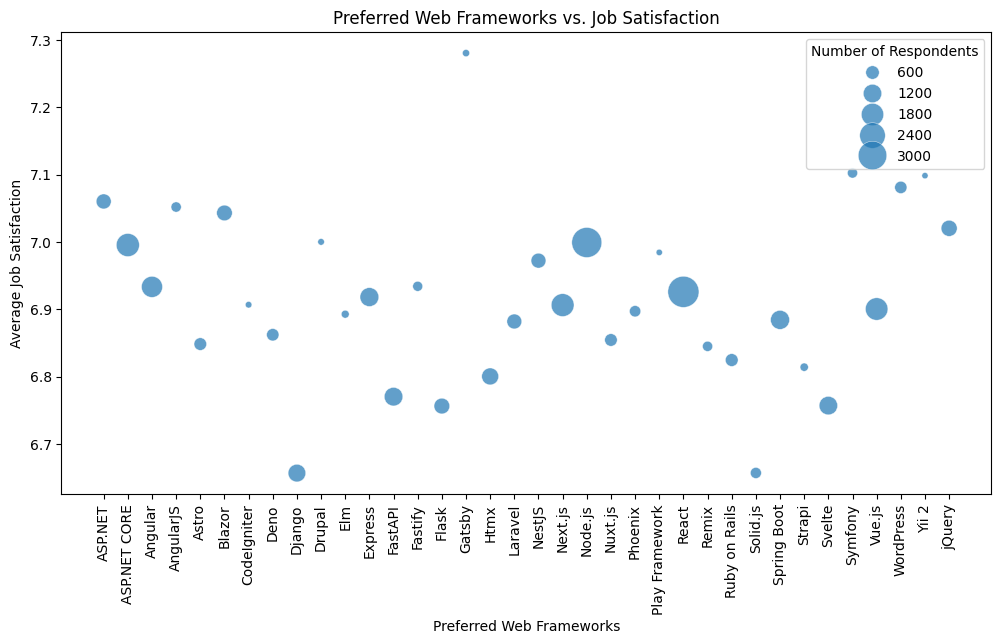

In [32]:


# Drop rows with missing values in relevant columns
df_web = df[['WebframeWantToWorkWith', 'JobSat']].dropna()

# Split multi-selected frameworks and explode them
df_web = df_web.assign(WebframeWantToWorkWith=df_web['WebframeWantToWorkWith'].str.split(';'))
df_web = df_web.explode('WebframeWantToWorkWith')

# Group by web framework and calculate counts & mean job satisfaction
web_grouped = df_web.groupby('WebframeWantToWorkWith').agg(
    num_respondents=('WebframeWantToWorkWith', 'size'),
    avg_job_satisfaction=('JobSat', 'mean')
).reset_index()

# Bubble Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=web_grouped,
    x='WebframeWantToWorkWith',
    y='avg_job_satisfaction',
    size='num_respondents',
    sizes=(20, 500),  # Adjust bubble sizes
    alpha=0.7
)

# Customization
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Preferred Web Frameworks")
plt.ylabel("Average Job Satisfaction")
plt.title("Preferred Web Frameworks vs. Job Satisfaction")
plt.legend(title="Number of Respondents", loc='upper right')
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



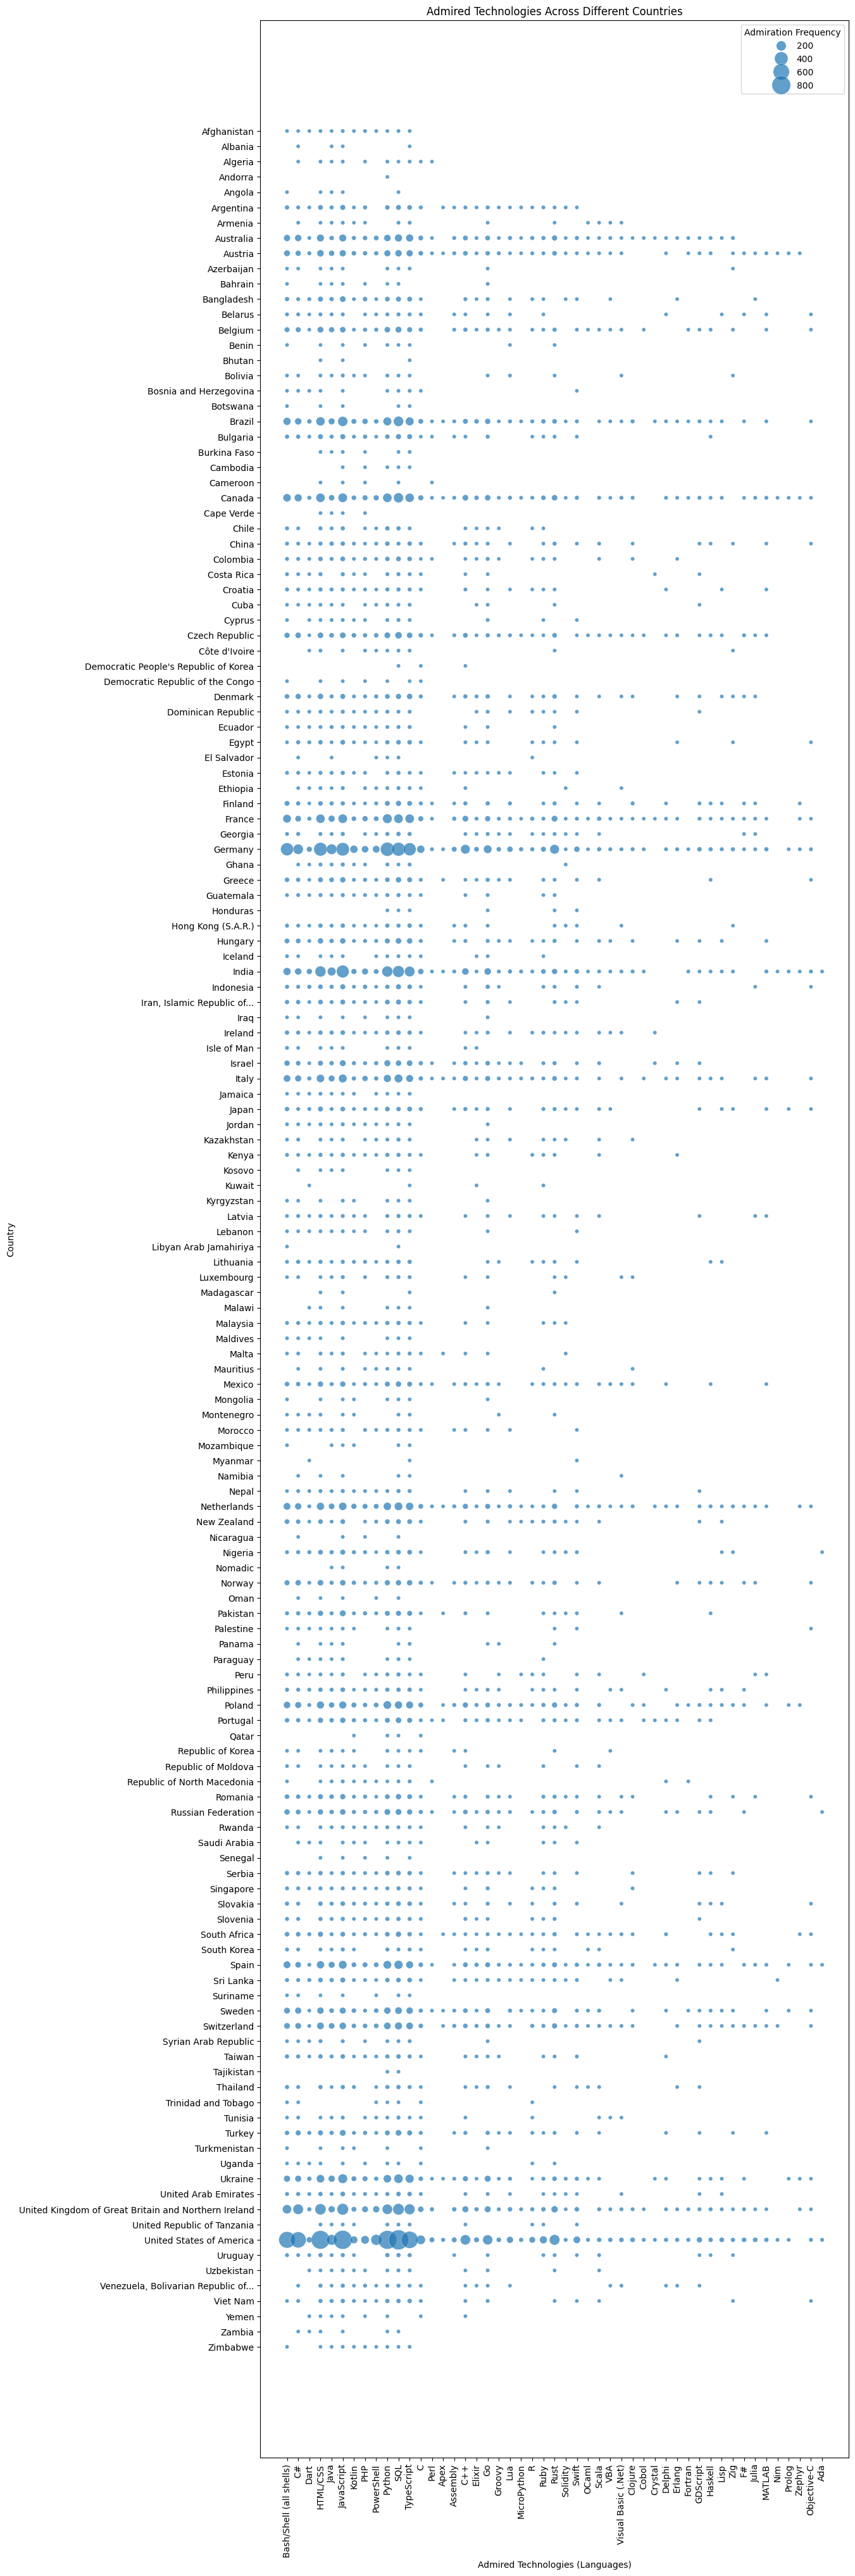

In [36]:


# Drop rows with missing values in relevant columns
df_languages = df[['Country', 'LanguageAdmired']].dropna()

# Split multi-selected admired languages and explode them
df_languages = df_languages.assign(LanguageAdmired=df_languages['LanguageAdmired'].str.split(';'))
df_languages = df_languages.explode('LanguageAdmired')

# Group by country and admired language, then calculate counts
language_grouped = df_languages.groupby(['Country', 'LanguageAdmired']).size().reset_index(name="AdmirationCount")

# Bubble Plot
plt.figure(figsize=(12, 50))
sns.scatterplot(
    data=language_grouped,
    x='LanguageAdmired',
    y='Country',
    size='AdmirationCount',
    sizes=(20, 500),  # Adjust bubble sizes
    alpha=0.7
)

# Customization
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Admired Technologies (Languages)")
plt.ylabel("Country")
plt.title("Admired Technologies Across Different Countries")
plt.legend(title="Admiration Frequency", loc='upper right')
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
